In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

import galsim

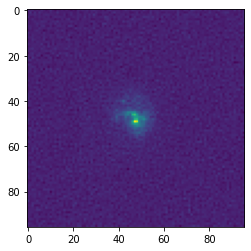

In [53]:
im_size = 96
pix_scale = 0.1 * 64 / im_size

bp_file = os.path.join(galsim.meta_data.share_dir, 'wfc_F814W.dat.gz')
bandpass = galsim.Bandpass(bp_file, wave_type='ang').thin().withZeropoint(25.94)

psf = galsim.OpticalPSF(diam=2.4, lam=1000.) # bigger than HST F814W PSF.

cosmos_cat = galsim.COSMOSCatalog(sample='23.5', dir='/n/holyscratch01/dvorkin_lab/smsharma/COSMOS_23.5_training_sample/')

ind = 204

im = cosmos_cat.makeGalaxy(ind, gal_type='real', noise_pad_size=im_size*pix_scale)

real_gal = galsim.Convolve(im, psf)
im_real = galsim.Image(im_size, im_size)
im = real_gal.drawImage(image=im_real, scale=pix_scale)

plt.imshow(im.array)

In [38]:
im_real.array.shape

(64, 64)